In [1]:
import pickle5 as pickle
import pandas as pd
from lime import lime_text
import sklearn.metrics as metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
n_classes=13

# NB on TFIDF

In [5]:
# Load NB model
loaded_MNB = pickle.load(open("./Trained_Models/abstracts only/TFIDF/best_mnbc.pickle", 'rb'))
classifier= loaded_MNB

# Test Data
X_test = pickle.load(open("./Trained_Models/abstracts only/TFIDF/NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("./Trained_Models/abstracts only/TFIDF/NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/TFIDF/NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/TFIDF/NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/tmp/ipykernel_178338/3317646484.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/TFIDF/best_mnbc.pickle", 'rb'))
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 w

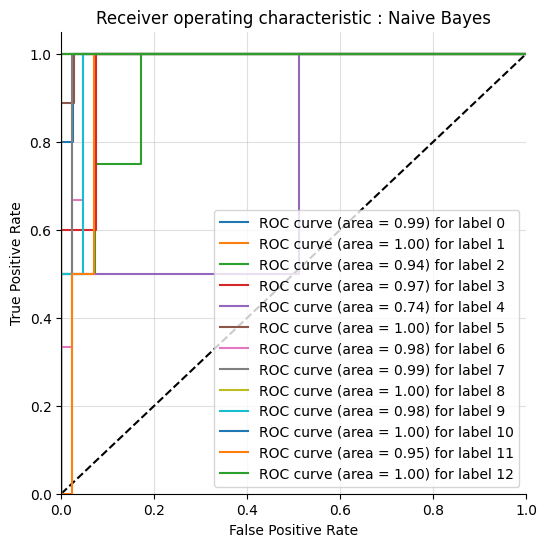

In [6]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(6, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic : Naive Bayes')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(loaded_MNB, X_test, y_test, n_classes=13, figsize=(6, 6))

from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(8, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc="best", prop=dict(size=14))


plt.show()


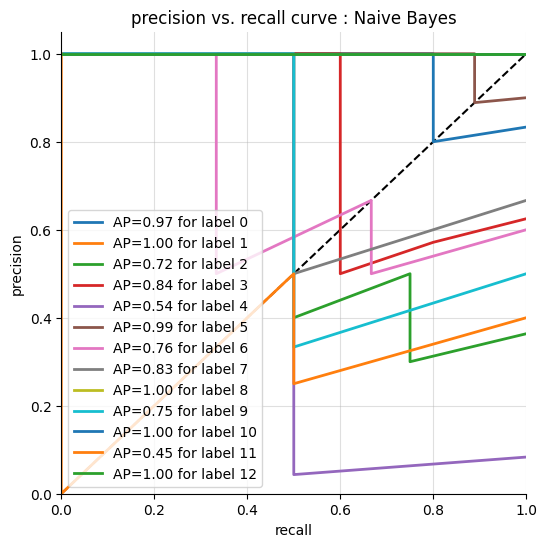

In [7]:
figsize = (6, 6)
n_classes=13
# precision recall curve
precision = dict()
recall = dict()
y_score = loaded_MNB.predict_proba(X_test)

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    #prc_auc[i] = metrics.auc(precision[i], recall[i])
    #plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))

fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_title('precision vs. recall curve : Naive Bayes')
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()


Average precision score, micro-averaged over all classes: 0.71


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.71')

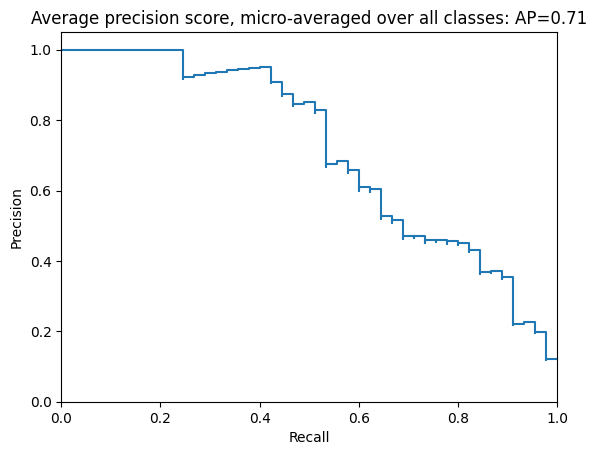

In [8]:
# For each class
precision_NBTFIDF = dict()
recall_NBTFIDF = dict()
average_precision_NBTFIDF = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBTFIDF[i], recall_NBTFIDF[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBTFIDF[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBTFIDF["micro"], recall_NBTFIDF["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBTFIDF["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBTFIDF["micro"]))


plt.figure()
plt.step(recall_NBTFIDF['micro'], precision_NBTFIDF['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision_NBTFIDF["micro"]))

# RF on TFIDF

In [9]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/TFIDF/best_rfc.pickle", 'rb'))
classifier =loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/TFIDF/RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/TFIDF/RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/TFIDF/RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/TFIDF/RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/tmp/ipykernel_178338/23129066.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  loaded_RF = pickle.load(open("../Trained_Models/abstracts only/TFIDF/best_rfc.pickle", 'rb'))
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.2

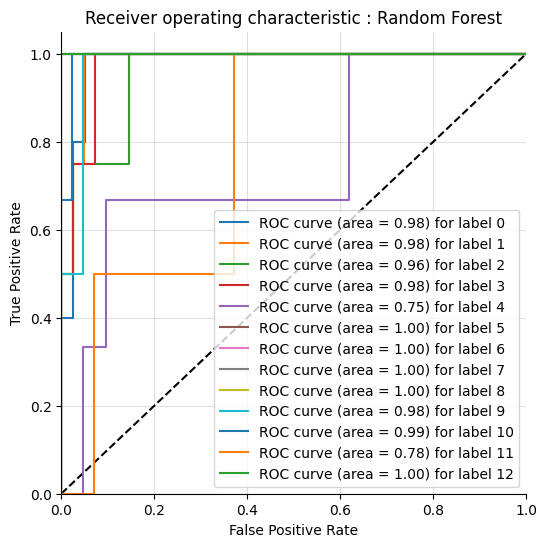

In [10]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(8, 8)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic : Random Forest')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(loaded_RF, X_test, y_test, n_classes=13, figsize=(6, 6))

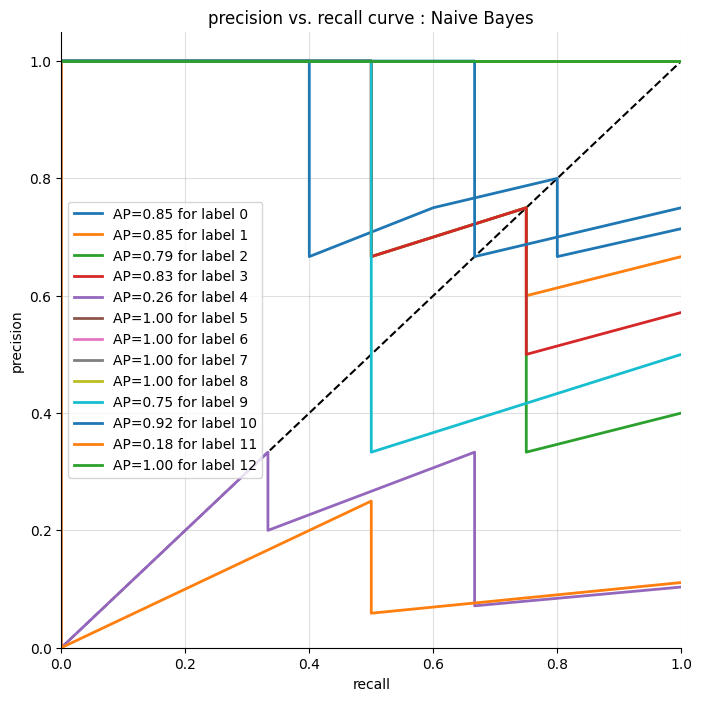

In [11]:
figsize = (8, 8)
# precision recall curve
precision = dict()
recall = dict()
y_score = loaded_RF.predict_proba(X_test)

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    #prc_auc[i] = metrics.auc(precision[i], recall[i])
    #plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))

fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_title('precision vs. recall curve : Naive Bayes')
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()


Average precision score, micro-averaged over all classes: 0.80


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.80')

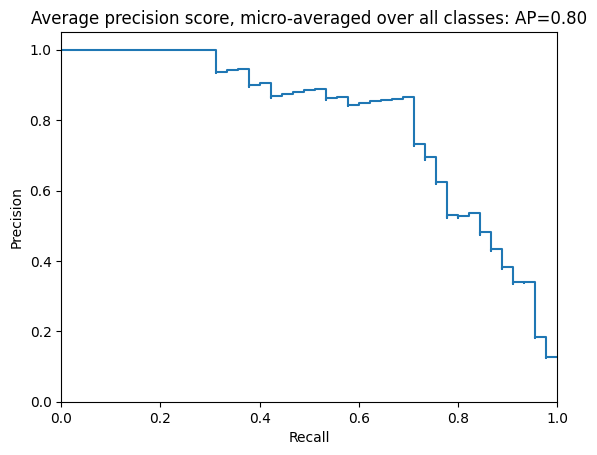

In [12]:

# For each class
precision_RFTFIDF = dict()
recall_RFTFIDF = dict()
average_precision_RFTFIDF = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFTFIDF[i], recall_RFTFIDF[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFTFIDF[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFTFIDF["micro"], recall_RFTFIDF["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFTFIDF["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFTFIDF["micro"]))


plt.figure()
plt.step(recall_RFTFIDF['micro'], precision_RFTFIDF['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFTFIDF["micro"]))

# LR on TFIDF

In [14]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/TFIDF/best_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/TFIDF/LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/TFIDF/LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/TFIDF/LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/TFIDF/LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/tmp/ipykernel_178338/1018087964.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  loaded_LR = pickle.load(open("../Trained_Models/abstracts only/TFIDF/best_lrc.pickle", 'rb'))
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.

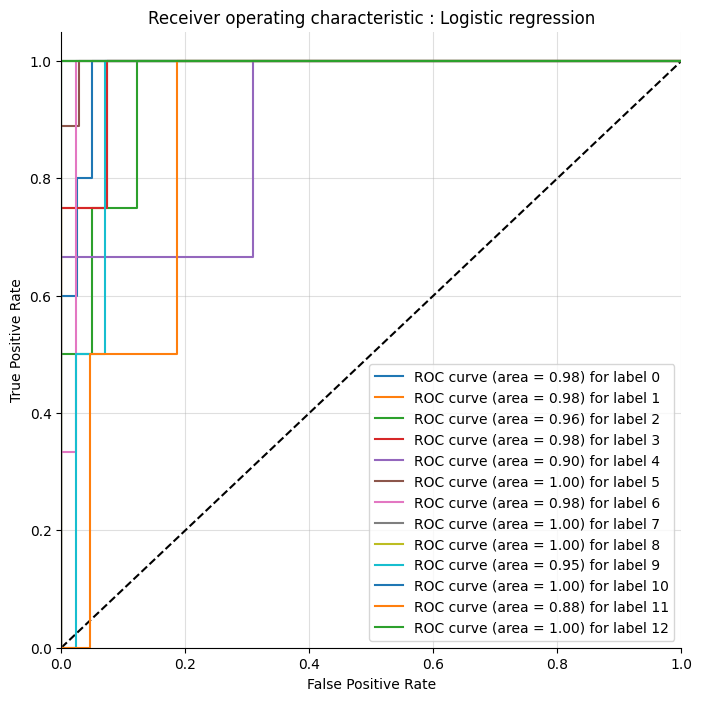

In [15]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic : Logistic regression')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(loaded_LR, X_test, y_test, n_classes=13, figsize=(8, 8))

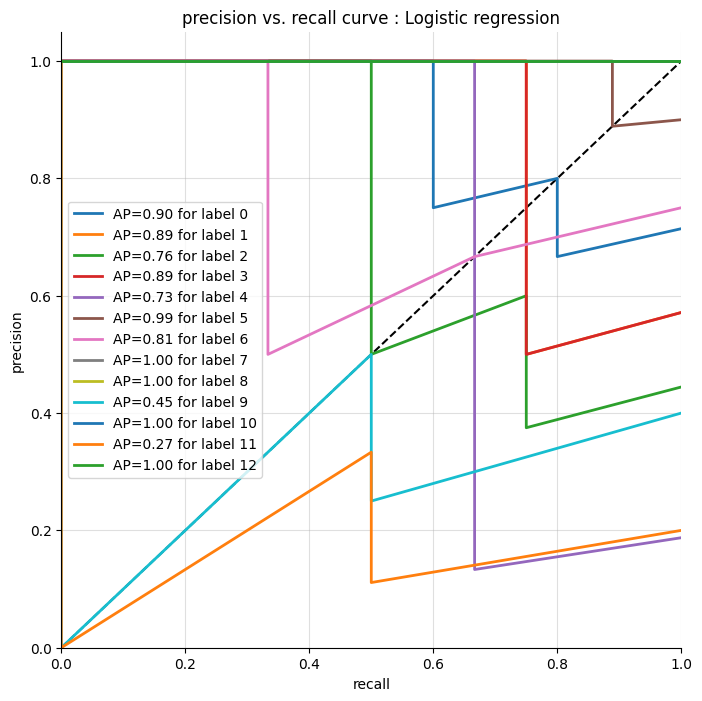

In [16]:
figsize = (8, 8)
# precision recall curve
precision = dict()
recall = dict()
y_score = loaded_LR.predict_proba(X_test)

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    #prc_auc[i] = metrics.auc(precision[i], recall[i])
    #plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))

fig, ax = plt.subplots(figsize=figsize)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_title('precision vs. recall curve : Logistic regression')
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
    average_precision = metrics.average_precision_score(y_test_dummies[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='AP=%0.2f for label %i'%(average_precision,i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()



Average precision score, micro-averaged over all classes: 0.70


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.70')

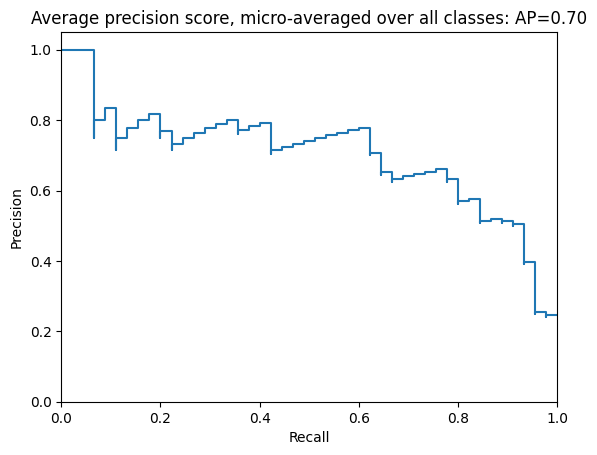

In [17]:

# For each class
precision_LRTFIDF = dict()
recall_LRTFIDF = dict()
average_precision_LRTFIDF = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRTFIDF[i], recall_LRTFIDF[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRTFIDF[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRTFIDF["micro"], recall_LRTFIDF["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRTFIDF["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRTFIDF["micro"]))


plt.figure()
plt.step(recall_LRTFIDF['micro'], precision_LRTFIDF['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRTFIDF["micro"]))

# NB on BERS2L

In [18]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/best_BERTS2L_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = loaded_MNB.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.53


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.53')

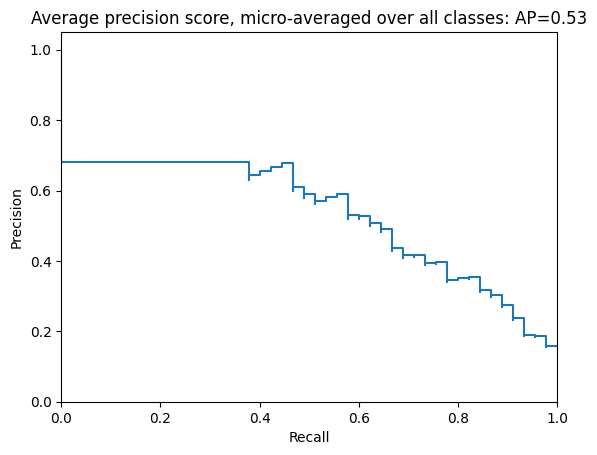

In [19]:

# For each class
precision_NBBERTS2L = dict()
recall_NBBERTS2L = dict()
average_precision_NBBERTS2L = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBERTS2L[i], recall_NBBERTS2L[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBERTS2L[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBERTS2L["micro"], recall_NBBERTS2L["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBERTS2L["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBERTS2L["micro"]))


plt.figure()
plt.step(recall_NBBERTS2L['micro'], precision_NBBERTS2L['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBERTS2L["micro"]))

# RF on BERTS2L

In [20]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/best_BERTS2L_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = loaded_RF.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.47


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.47')

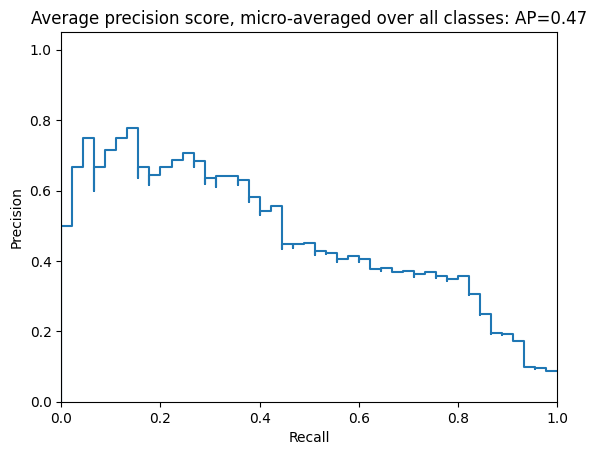

In [21]:

# For each class
precision_RFBERTS2L = dict()
recall_RFBERTS2L = dict()
average_precision_RFBERTS2L = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBERTS2L[i], recall_RFBERTS2L[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBERTS2L[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBERTS2L["micro"], recall_RFBERTS2L["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBERTS2L["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBERTS2L["micro"]))


plt.figure()
plt.step(recall_RFBERTS2L['micro'], precision_RFBERTS2L['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBERTS2L["micro"]))

# LR on BERTS2L

In [22]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/best_BERTS2L_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTS2Labs/BERTS2L-LR-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = loaded_LR.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.83


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.83')

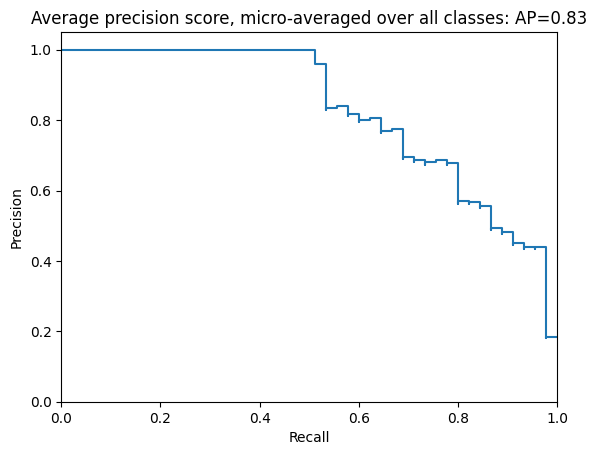

In [23]:

# For each class
precision_LRBERTS2L = dict()
recall_LRBERTS2L = dict()
average_precision_LRBERTS2L = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERTS2L[i], recall_LRBERTS2L[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERTS2L[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERTS2L["micro"], recall_LRBERTS2L["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERTS2L["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERTS2L["micro"]))


plt.figure()
plt.step(recall_LRBERTS2L['micro'], precision_LRBERTS2L['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERTS2L["micro"]))

# NB on ELMO

In [24]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/best_ELMO_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.31


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.31')

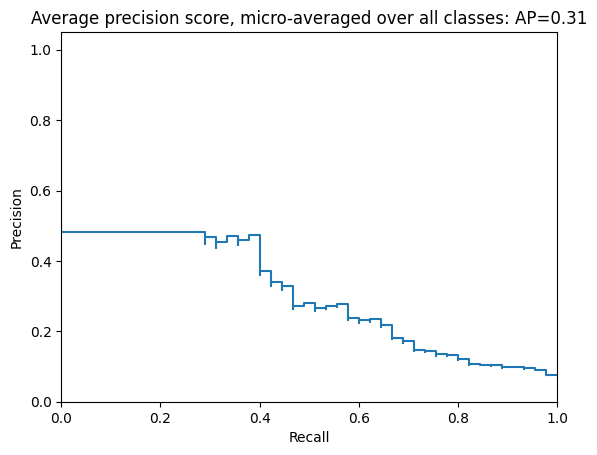

In [25]:

# For each class
precision_NBELMO = dict()
recall_NBELMO = dict()
average_precision_NBELMO = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBELMO[i], recall_NBELMO[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBELMO[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBELMO["micro"], recall_NBELMO["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBELMO["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBELMO["micro"]))


plt.figure()
plt.step(recall_NBELMO['micro'], precision_NBELMO['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBELMO["micro"]))

# RF ob ELMO

In [26]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/best_ELMO_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.46


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.46')

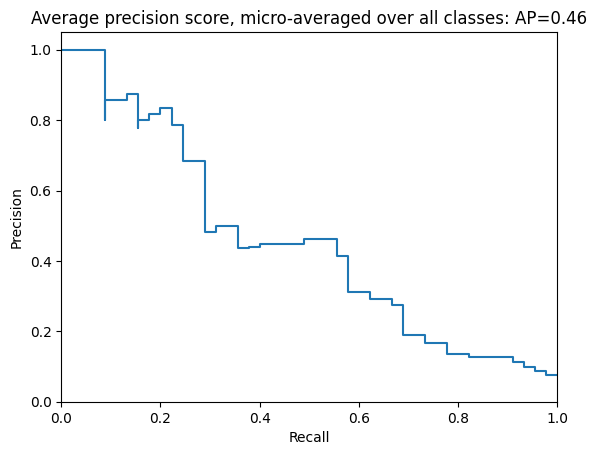

In [27]:

# For each class
precision_RFELMO = dict()
recall_RFELMO = dict()
average_precision_RFELMO = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFELMO[i], recall_RFELMO[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFELMO[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFELMO["micro"], recall_RFELMO["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFELMO["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFELMO["micro"]))


plt.figure()
plt.step(recall_RFELMO['micro'], precision_RFELMO['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFELMO["micro"]))

# LR on ELMO

In [28]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/best_ELMO_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELMOabs/ELMO-LR-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.50


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.50')

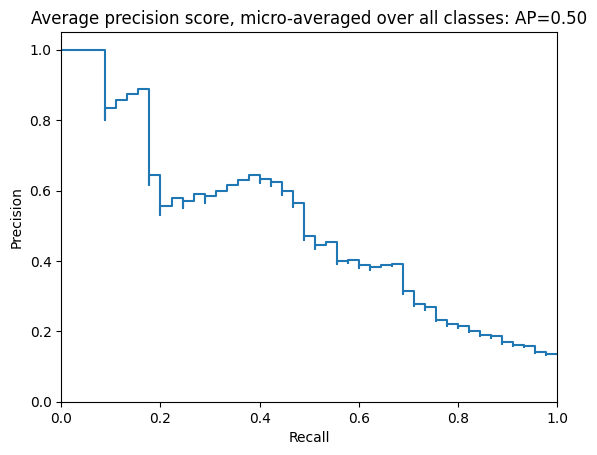

In [29]:

# For each class
precision_LRELMO = dict()
recall_LRELMO = dict()
average_precision_LRELMO = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRELMO[i], recall_LRELMO[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRELMO[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRELMO["micro"], recall_LRELMO["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRELMO["micro"] = average_precision_score(y_test_dummies, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRELMO["micro"]))


plt.figure()
plt.step(recall_LRELMO['micro'], precision_LRELMO['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRELMO["micro"]))

# NB on ELECTRA

In [30]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/best_ELECTRA_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.14


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.14')

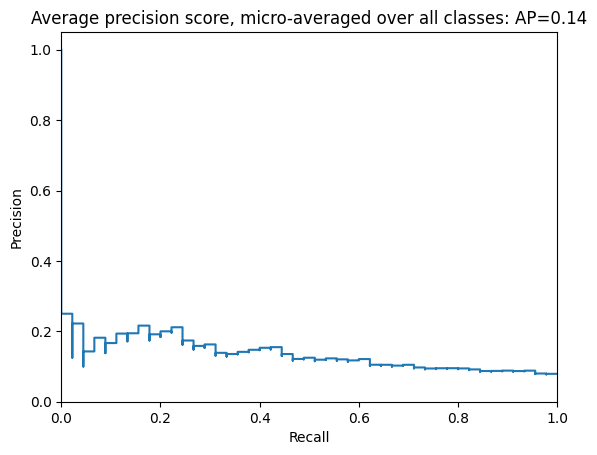

In [31]:

# For each class
precision_NBELECTRA = dict()
recall_NBELECTRA = dict()
average_precision_NBELECTRA = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBELECTRA[i], recall_NBELECTRA[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBELECTRA[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBELECTRA["micro"], recall_NBELECTRA["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBELECTRA["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBELECTRA["micro"]))


plt.figure()
plt.step(recall_NBELECTRA['micro'], precision_NBELECTRA['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBELECTRA["micro"]))

# RF on ELECTRA

In [32]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/best_ELECTRA_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.17


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.17')

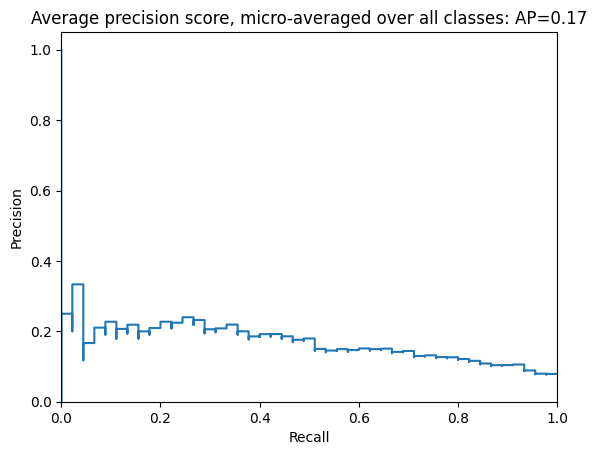

In [33]:

# For each class
precision_RFELECTRA = dict()
recall_RFELECTRA = dict()
average_precision_RFELECTRA = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFELECTRA[i], recall_RFELECTRA[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFELECTRA[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFELECTRA["micro"], recall_RFELECTRA["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFELECTRA["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFELECTRA["micro"]))


plt.figure()
plt.step(recall_RFELECTRA['micro'], precision_RFELECTRA['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFELECTRA["micro"]))

# LR on ELECTRA

In [34]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/best_ELECTRA_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs/ELECTRA-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.20


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.20')

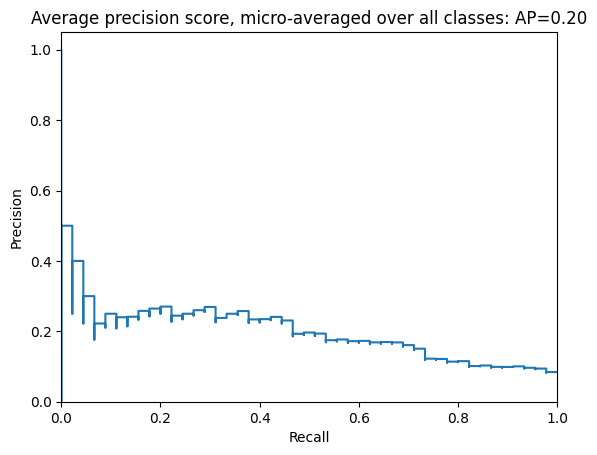

In [35]:

# For each class
precision_LRELECTRA = dict()
recall_LRELECTRA = dict()
average_precision_LRELECTRA = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRELECTRA[i], recall_LRELECTRA[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRELECTRA[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRELECTRA["micro"], recall_LRELECTRA["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRELECTRA["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRELECTRA["micro"]))


plt.figure()
plt.step(recall_LRELECTRA['micro'], precision_LRELECTRA['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRELECTRA["micro"]))

# NB on ELECTRA NoSL

In [36]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/best_ELECTRA-nsl_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.51


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.51')

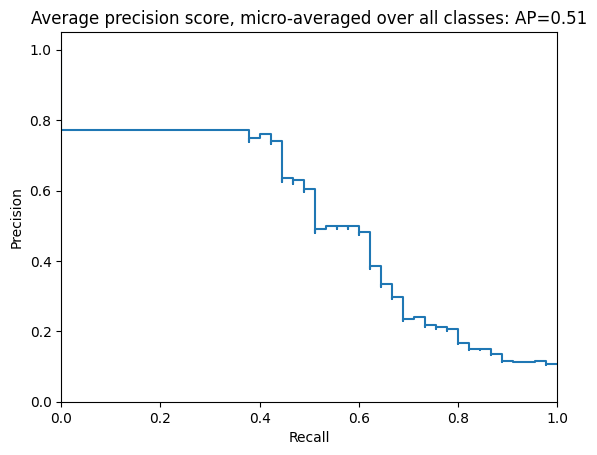

In [37]:

# For each class
precision_NBELECTRA_nsl = dict()
recall_NBELECTRA_nsl = dict()
average_precision_NBELECTRA_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBELECTRA_nsl[i], recall_NBELECTRA_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBELECTRA_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBELECTRA_nsl["micro"], recall_NBELECTRA_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBELECTRA_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBELECTRA_nsl["micro"]))


plt.figure()
plt.step(recall_NBELECTRA_nsl['micro'], precision_NBELECTRA_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBELECTRA_nsl["micro"]))

# RF on ELECTRA NoSL

In [38]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/best_ELECTRA-nsl_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.50


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.50')

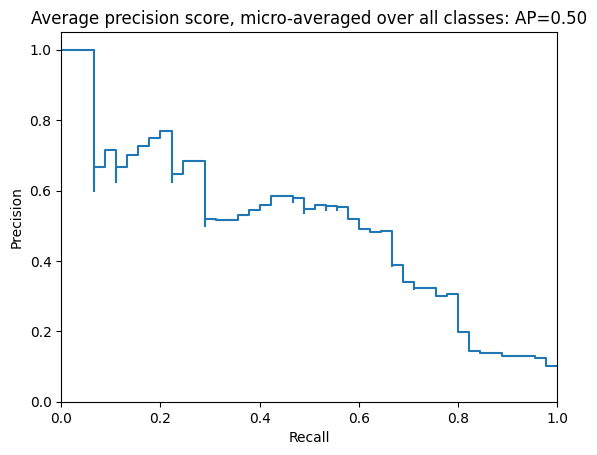

In [39]:

# For each class
precision_RFELECTRA_nsl = dict()
recall_RFELECTRA_nsl = dict()
average_precision_RFELECTRA_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFELECTRA_nsl[i], recall_RFELECTRA_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFELECTRA_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFELECTRA_nsl["micro"], recall_RFELECTRA_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFELECTRA_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFELECTRA_nsl["micro"]))


plt.figure()
plt.step(recall_RFELECTRA_nsl['micro'], precision_RFELECTRA_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFELECTRA_nsl["micro"]))

# LR on ELECTRA NoSL

In [40]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/best_ELECTRA-nsl_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAabs-nsl/ELECTRA-nsl-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.64


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.64')

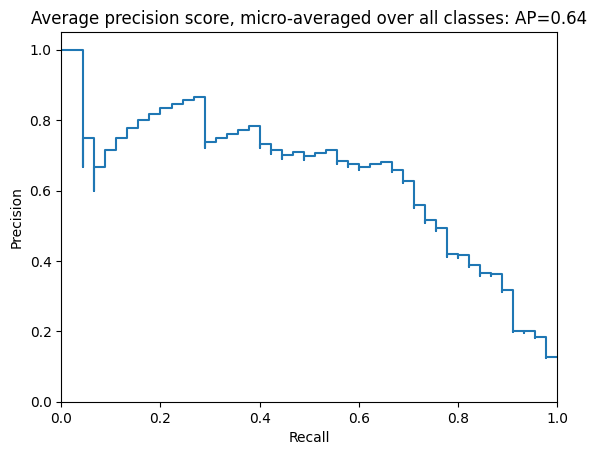

In [41]:

# For each class
precision_LRELECTRA_nsl = dict()
recall_LRELECTRA_nsl = dict()
average_precision_LRELECTRA_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRELECTRA_nsl[i], recall_LRELECTRA_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRELECTRA_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRELECTRA_nsl["micro"], recall_LRELECTRA_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRELECTRA_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRELECTRA_nsl["micro"]))


plt.figure()
plt.step(recall_LRELECTRA_nsl['micro'], precision_LRELECTRA_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRELECTRA_nsl["micro"]))

# NB on ELECTRAMED NoSL

In [42]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/best_ELECTRAMED_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.41


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.41')

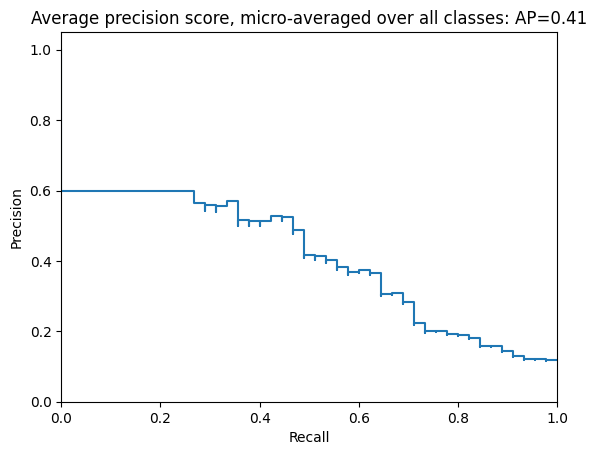

In [43]:

# For each class
precision_NBELECTRAMED_nsl = dict()
recall_NBELECTRAMED_nsl = dict()
average_precision_NBELECTRAMED_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBELECTRAMED_nsl[i], recall_NBELECTRAMED_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBELECTRAMED_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBELECTRAMED_nsl["micro"], recall_NBELECTRAMED_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBELECTRAMED_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBELECTRAMED_nsl["micro"]))


plt.figure()
plt.step(recall_NBELECTRAMED_nsl['micro'], precision_NBELECTRAMED_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBELECTRAMED_nsl["micro"]))

# RF on ELECTRAMED NoSL

In [44]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/best_ELECTRAMED_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.49


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.49')

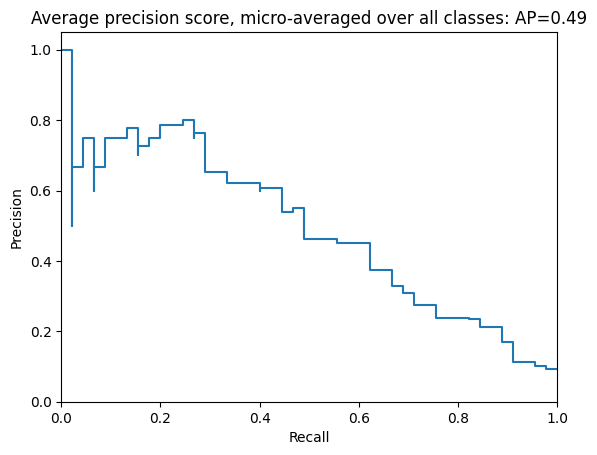

In [45]:

# For each class
precision_RFELECTRAMED_nsl = dict()
recall_RFELECTRAMED_nsl = dict()
average_precision_RFELECTRAMED_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFELECTRAMED_nsl[i], recall_RFELECTRAMED_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFELECTRAMED_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFELECTRAMED_nsl["micro"], recall_RFELECTRAMED_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFELECTRAMED_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFELECTRAMED_nsl["micro"]))


plt.figure()
plt.step(recall_RFELECTRAMED_nsl['micro'], precision_RFELECTRAMED_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFELECTRAMED_nsl["micro"]))

# LR on ELECTRAMED NoSL

In [46]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/best_ELECTRAMED_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs/ELECTRAMED-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.64


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.64')

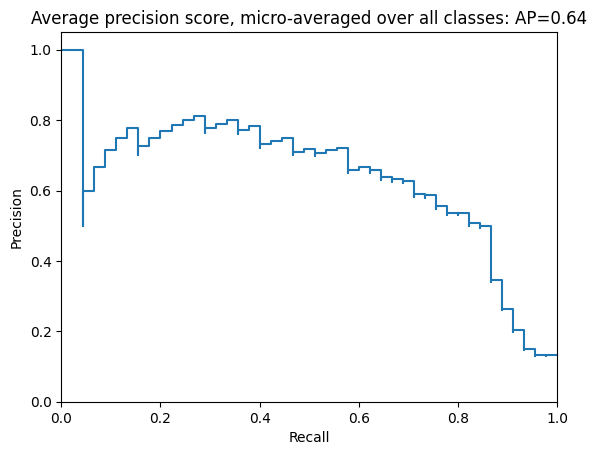

In [47]:

# For each class
precision_LRELECTRAMED_nsl = dict()
recall_LRELECTRAMED_nsl = dict()
average_precision_LRELECTRAMED_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRELECTRAMED_nsl[i], recall_LRELECTRAMED_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRELECTRAMED_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRELECTRAMED_nsl["micro"], recall_LRELECTRAMED_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRELECTRAMED_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRELECTRAMED_nsl["micro"]))


plt.figure()
plt.step(recall_LRELECTRAMED_nsl['micro'], precision_LRELECTRAMED_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRELECTRAMED_nsl["micro"]))

# NB on ELECTRAMED

In [48]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/best_ELECTRAMED_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.15


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.15')

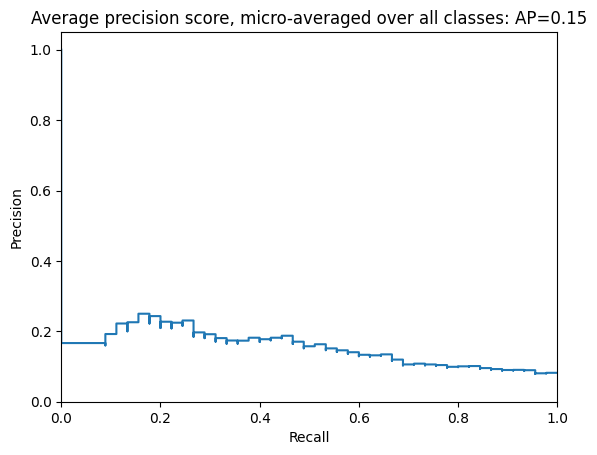

In [49]:

# For each class
precision_NBELECTRAMED = dict()
recall_NBELECTRAMED = dict()
average_precision_NBELECTRAMED = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBELECTRAMED[i], recall_NBELECTRAMED[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBELECTRAMED[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBELECTRAMED["micro"], recall_NBELECTRAMED["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBELECTRAMED["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBELECTRAMED["micro"]))


plt.figure()
plt.step(recall_NBELECTRAMED['micro'], precision_NBELECTRAMED['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBELECTRAMED["micro"]))

# RF on ELECTRAMED

In [50]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/best_ELECTRAMED_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.21


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.21')

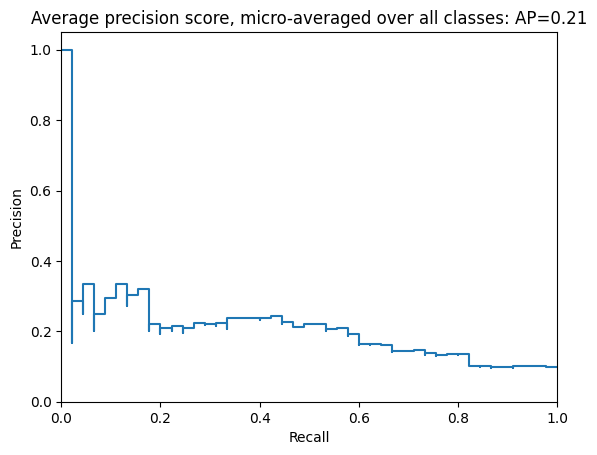

In [51]:

# For each class
precision_RFELECTRAMED = dict()
recall_RFELECTRAMED = dict()
average_precision_RFELECTRAMED = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFELECTRAMED[i], recall_RFELECTRAMED[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFELECTRAMED[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFELECTRAMED["micro"], recall_RFELECTRAMED["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFELECTRAMED["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFELECTRAMED["micro"]))


plt.figure()
plt.step(recall_RFELECTRAMED['micro'], precision_RFELECTRAMED['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFELECTRAMED["micro"]))

# LR on ELECTRAMED

In [52]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/best_ELECTRAMED_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ELECTRAMEDabs2/ELECTRAMED-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.24


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.24')

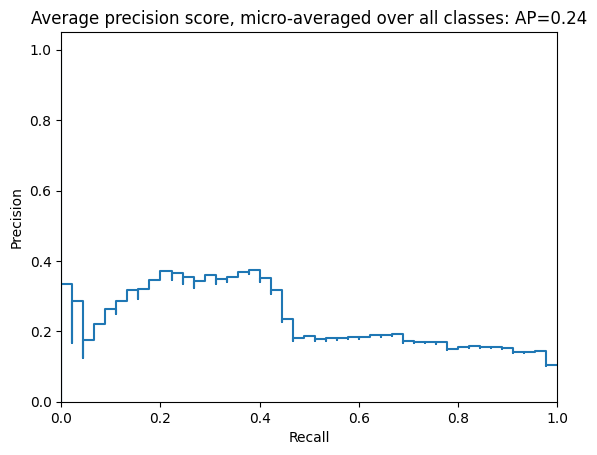

In [53]:

# For each class
precision_LRELECTRAMED = dict()
recall_LRELECTRAMED = dict()
average_precision_LRELECTRAMED = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRELECTRAMED[i], recall_LRELECTRAMED[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRELECTRAMED[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRELECTRAMED["micro"], recall_LRELECTRAMED["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRELECTRAMED["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRELECTRAMED["micro"]))


plt.figure()
plt.step(recall_LRELECTRAMED['micro'], precision_LRELECTRAMED['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRELECTRAMED["micro"]))

# NB on XLNET

In [54]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/best_XLNET_mnbc.pickle", 'rb'))
classifier= loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-NB-y_train.pkl", 'rb'))

# make predictions

y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.33


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.33')

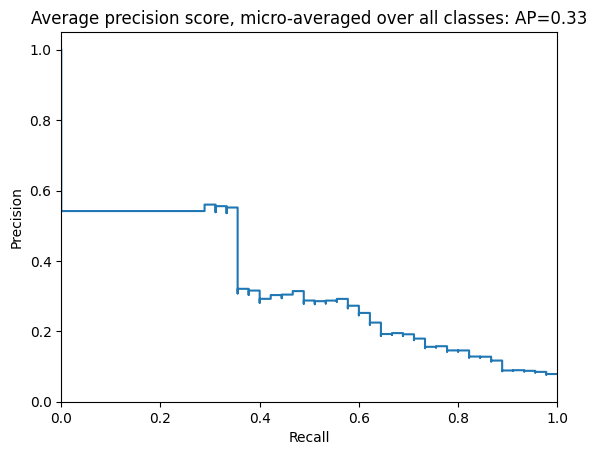

In [55]:

# For each class
precision_NBXLNET = dict()
recall_NBXLNET = dict()
average_precision_NBXLNET = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBXLNET[i], recall_NBXLNET[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBXLNET[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBXLNET["micro"], recall_NBXLNET["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBXLNET["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBXLNET["micro"]))


plt.figure()
plt.step(recall_NBXLNET['micro'], precision_NBXLNET['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBXLNET["micro"]))

# RF on XLNET

In [56]:
import pickle5 as pickle

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/best_XLNET_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.33


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.33')

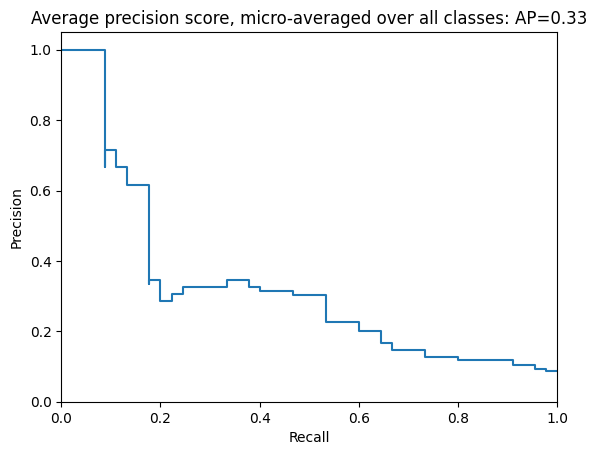

In [57]:

# For each class
precision_RFXLNET = dict()
recall_RFXLNET = dict()
average_precision_RFXLNET = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFXLNET[i], recall_RFXLNET[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFXLNET[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFXLNET["micro"], recall_RFXLNET["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFXLNET["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFXLNET["micro"]))


plt.figure()
plt.step(recall_RFXLNET['micro'], precision_RFXLNET['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFXLNET["micro"]))

# LR on XLNET

In [58]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/best_XLNET_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/XLNETabs/XLNET-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.46


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.46')

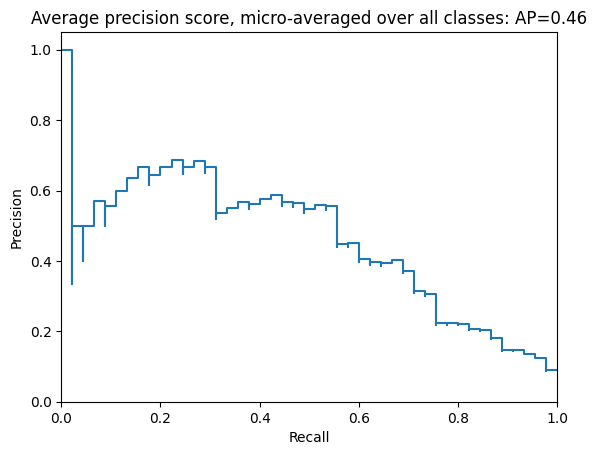

In [59]:

# For each class
precision_LRXLNET = dict()
recall_LRXLNET = dict()
average_precision_LRXLNET = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRXLNET[i], recall_LRXLNET[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRXLNET[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRXLNET["micro"], recall_LRXLNET["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRXLNET["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRXLNET["micro"]))


plt.figure()
plt.step(recall_LRXLNET['micro'], precision_LRXLNET['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRXLNET["micro"]))

# NB on RoBERTa

In [60]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/best_ROBERTA_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)



/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.43


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.43')

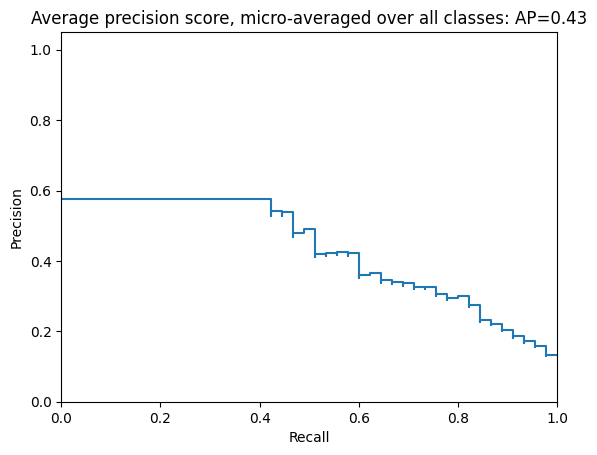

In [61]:

# For each class
precision_NBRoBERTa = dict()
recall_NBRoBERTa = dict()
average_precision_NBRoBERTa = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBRoBERTa[i], recall_NBRoBERTa[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBRoBERTa[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBRoBERTa["micro"], recall_NBRoBERTa["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBRoBERTa["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBRoBERTa["micro"]))


plt.figure()
plt.step(recall_NBRoBERTa['micro'], precision_NBRoBERTa['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBRoBERTa["micro"]))

# RF on RoBERTa

In [62]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/best_ROBERTA_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.50


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.50')

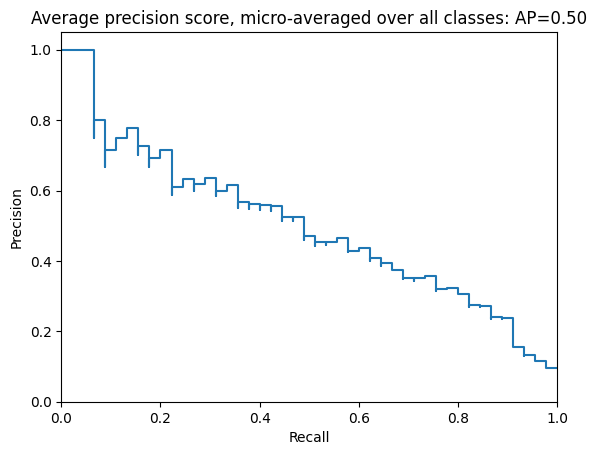

In [63]:

# For each class
precision_RFRoBERTa = dict()
recall_RFRoBERTa = dict()
average_precision_RFRoBERTa = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFRoBERTa[i], recall_RFRoBERTa[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFRoBERTa[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFRoBERTa["micro"], recall_RFRoBERTa["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFRoBERTa["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFRoBERTa["micro"]))


plt.figure()
plt.step(recall_RFRoBERTa['micro'], precision_RFRoBERTa['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFRoBERTa["micro"]))

# LR on RoBERTa

In [64]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/best_ROBERTA_lrc.pickle", 'rb'))
classifier = loaded_LR

# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/ROBERTAabs/ROBERTA-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.61


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.61')

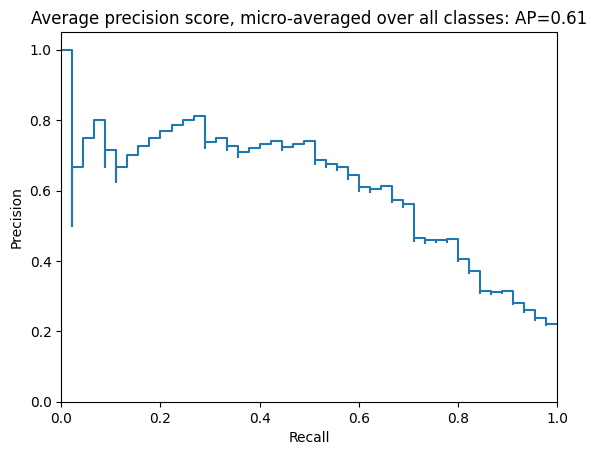

In [65]:

# For each class
precision_LRRoBERTa = dict()
recall_LRRoBERTa = dict()
average_precision_LRRoBERTa = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRRoBERTa[i], recall_LRRoBERTa[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRRoBERTa[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRRoBERTa["micro"], recall_LRRoBERTa["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRRoBERTa["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRRoBERTa["micro"]))


plt.figure()
plt.step(recall_LRRoBERTa['micro'], precision_LRRoBERTa['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRRoBERTa["micro"]))

# NB on BERT

In [66]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/best_BERTstsb_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.53


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.53')

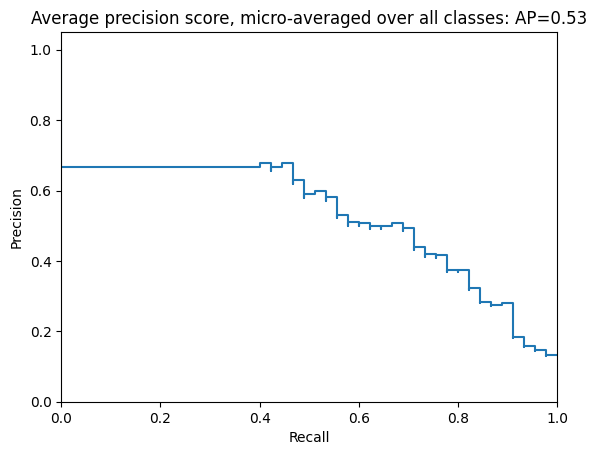

In [67]:

# For each class
precision_NBBERT = dict()
recall_NBBERT = dict()
average_precision_NBBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBERT[i], recall_NBBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBERT["micro"], recall_NBBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBERT["micro"]))


plt.figure()
plt.step(recall_NBBERT['micro'], precision_NBBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBERT["micro"]))

# RF on BERT

In [68]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/best_BERTstsb_rfc.pickle", 'rb'))
classifier = loaded_RF

# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.54


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.54')

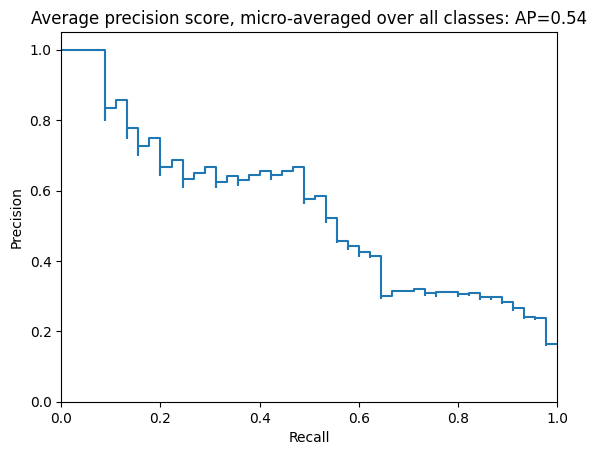

In [69]:

# For each class
precision_RFBERT = dict()
recall_RFBERT = dict()
average_precision_RFBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBERT[i], recall_RFBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBERT["micro"], recall_RFBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBERT["micro"]))


plt.figure()
plt.step(recall_RFBERT['micro'], precision_RFBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBERT["micro"]))

# LR on BERT

In [70]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/best_BERTstsb_lrc.pickle", 'rb'))
classifier = loaded_LR

# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTstsbabs/BERTstsb-LR-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.75


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.75')

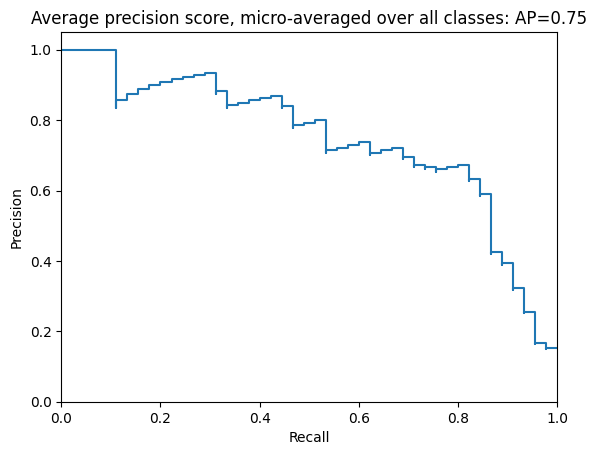

In [71]:

# For each class
precision_LRBERT = dict()
recall_LRBERT = dict()
average_precision_LRBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERT[i], recall_LRBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERT["micro"], recall_LRBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERT["micro"]))


plt.figure()
plt.step(recall_LRBERT['micro'], precision_LRBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERT["micro"]))

# NB on BioBERT NoSL

In [72]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/best_BIOBERT-nsl_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.56


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.56')

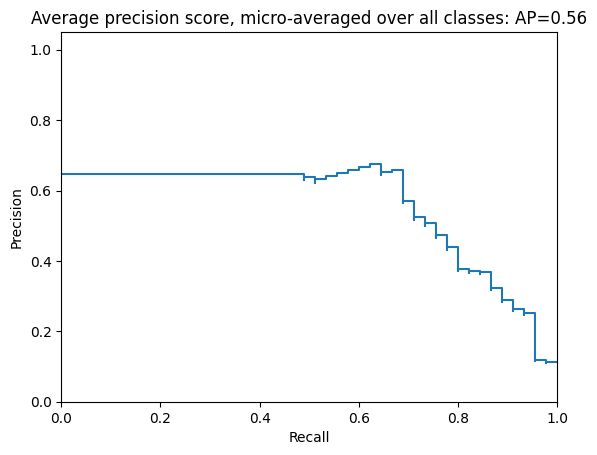

In [73]:

# For each class
precision_NBBioBERT_nsl = dict()
recall_NBBioBERT_nsl = dict()
average_precision_NBBioBERT_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBioBERT_nsl[i], recall_NBBioBERT_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBioBERT_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBioBERT_nsl["micro"], recall_NBBioBERT_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBioBERT_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBioBERT_nsl["micro"]))


plt.figure()
plt.step(recall_NBBioBERT_nsl['micro'], precision_NBBioBERT_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBioBERT_nsl["micro"]))

# RF on BioBERT NoSL

In [74]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/best_BIOBERT-nsl_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.61


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.61')

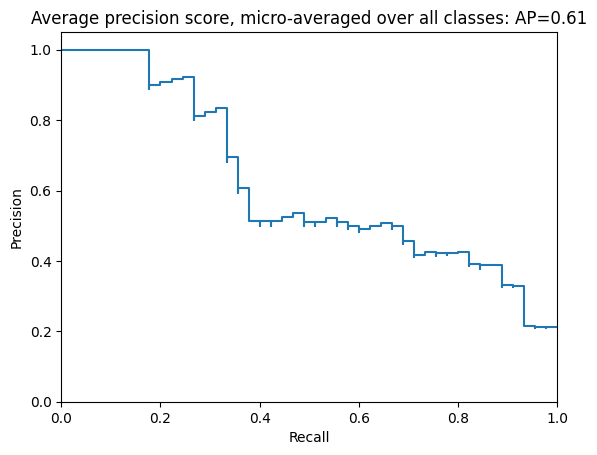

In [75]:

# For each class
precision_RFBioBERT_nsl = dict()
recall_RFBioBERT_nsl= dict()
average_precision_RFBioBERT_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBioBERT_nsl[i], recall_RFBioBERT_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBioBERT_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBioBERT_nsl["micro"], recall_RFBioBERT_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBioBERT_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBioBERT_nsl["micro"]))


plt.figure()
plt.step(recall_RFBioBERT_nsl['micro'], precision_RFBioBERT_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBioBERT_nsl["micro"]))

# LR on BioBERT NoSL

In [76]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/best_BIOBERT-nsl_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs-nsl/BIOBERT-nsl-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.85


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.85')

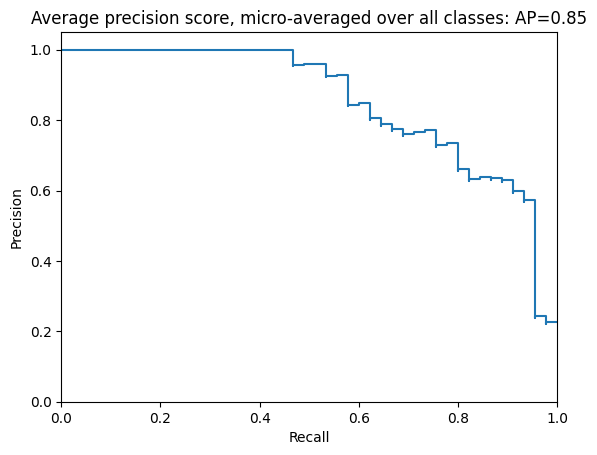

In [77]:

# For each class
precision_LRBioBERT_nsl = dict()
recall_LRBioBERT_nsl = dict()
average_precision_LRBioBERT_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBioBERT_nsl[i], recall_LRBioBERT_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBioBERT_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBioBERT_nsl["micro"], recall_LRBioBERT_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBioBERT_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBioBERT_nsl["micro"]))


plt.figure()
plt.step(recall_LRBioBERT_nsl['micro'], precision_LRBioBERT_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBioBERT_nsl["micro"]))

# LR on BERTS2L+BioBERT NoSL

In [78]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/Bert_S2L+BioBERT_nslabs/best_BERTS2L+BIOBERT_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/Bert_S2L+BioBERT_nslabs/BERTS2L-BIOBERT-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/Bert_S2L+BioBERT_nslabs/BERTS2L-BIOBERT-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/Bert_S2L+BioBERT_nslabs/BERTS2L-BIOBERT-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/Bert_S2L+BioBERT_nslabs/BERTS2L-BIOBERT-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.83


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.83')

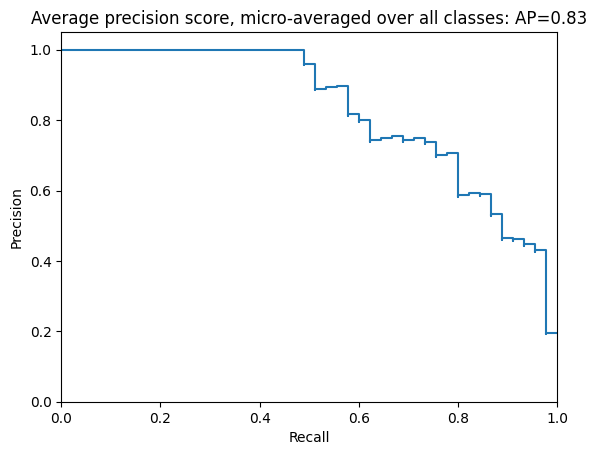

In [79]:

# For each class
precision_LRBERTS2LBioBERT_nsl = dict()
recall_LRBERTS2LBioBERT_nsl = dict()
average_precision_LRBERTS2LBioBERT_nsl = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERTS2LBioBERT_nsl[i], recall_LRBERTS2LBioBERT_nsl[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERTS2LBioBERT_nsl[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERTS2LBioBERT_nsl["micro"], recall_LRBERTS2LBioBERT_nsl["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERTS2LBioBERT_nsl["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERTS2LBioBERT_nsl["micro"]))


plt.figure()
plt.step(recall_LRBERTS2LBioBERT_nsl['micro'], precision_LRBERTS2LBioBERT_nsl['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERTS2LBioBERT_nsl["micro"]))

# NB on BioBERT

In [80]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/best_BIOBERT_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.49


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.49')

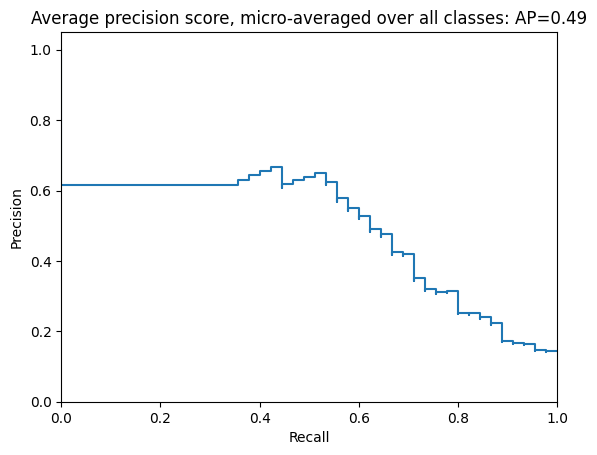

In [81]:

# For each class
precision_NBBioBERT = dict()
recall_NBBioBERT = dict()
average_precision_NBBioBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBioBERT[i], recall_NBBioBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBioBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBioBERT["micro"], recall_NBBioBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBioBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBioBERT["micro"]))


plt.figure()
plt.step(recall_NBBioBERT['micro'], precision_NBBioBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBioBERT["micro"]))

# RF on BioBERT

In [82]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/best_BIOBERT_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.63


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.63')

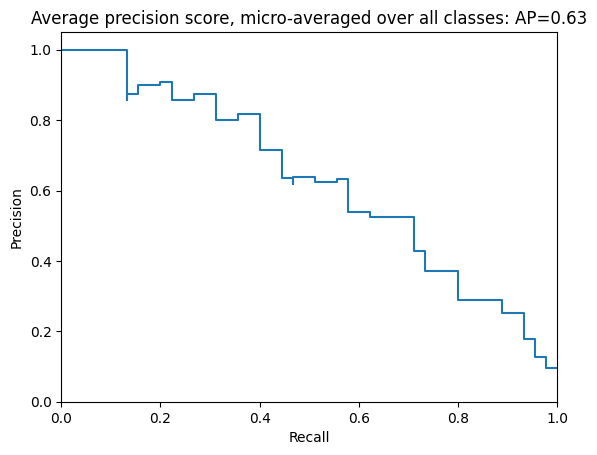

In [83]:

# For each class
precision_RFBioBERT = dict()
recall_RFBioBERT = dict()
average_precision_RFBioBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBioBERT[i], recall_RFBioBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBioBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBioBERT["micro"], recall_RFBioBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBioBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBioBERT["micro"]))


plt.figure()
plt.step(recall_RFBioBERT['micro'], precision_RFBioBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBioBERT["micro"]))

# LR on BioBERT

In [84]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/best_BIOBERT_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BIOBERTabs/BIOBERT-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.73


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.73')

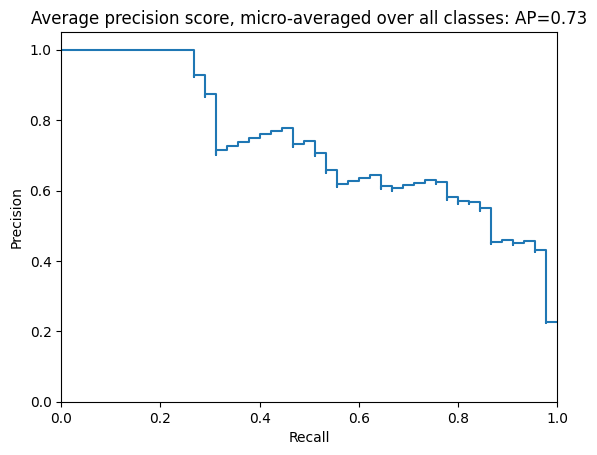

In [85]:

# For each class
precision_LRBioBERT = dict()
recall_LRBioBERT = dict()
average_precision_LRBioBERT = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBioBERT[i], recall_LRBioBERT[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBioBERT[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBioBERT["micro"], recall_LRBioBERT["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBioBERT["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBioBERT["micro"]))


plt.figure()
plt.step(recall_LRBioBERT['micro'], precision_LRBioBERT['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBioBERT["micro"]))

# NB on GLOVE

In [86]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/best_GLOVE_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.36


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.36')

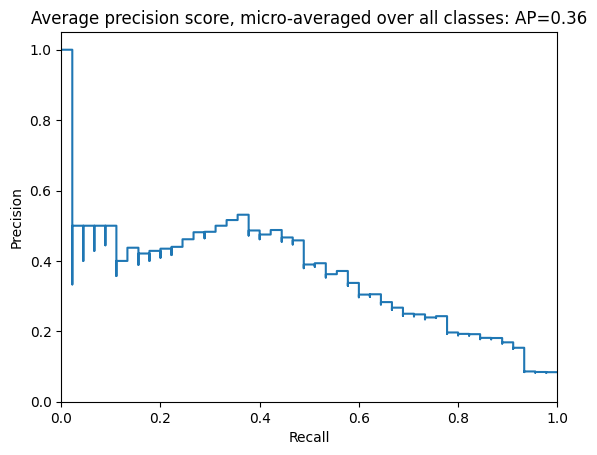

In [87]:

# For each class
precision_NBGLOVE = dict()
recall_NBGLOVE = dict()
average_precision_NBGLOVE = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBGLOVE[i], recall_NBGLOVE[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBGLOVE[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBGLOVE["micro"], recall_NBGLOVE["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBGLOVE["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBGLOVE["micro"]))


plt.figure()
plt.step(recall_NBGLOVE['micro'], precision_NBGLOVE['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBGLOVE["micro"]))

# RF on GLOVE

In [88]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/best_GLOVE_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-RF-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.44


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.44')

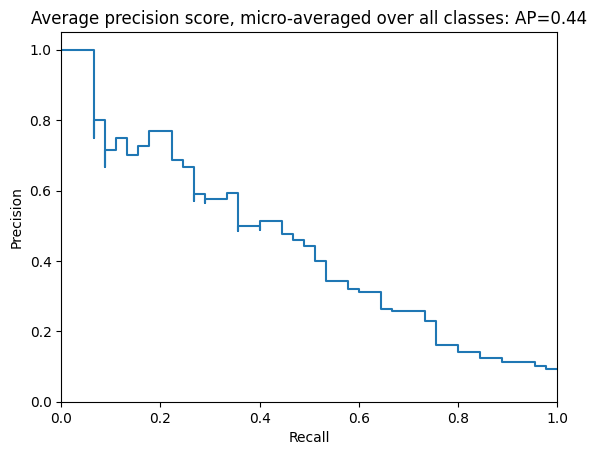

In [89]:

# For each class
precision_RFGLOVE = dict()
recall_RFGLOVE = dict()
average_precision_RFGLOVE = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFGLOVE[i], recall_RFGLOVE[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFGLOVE[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFGLOVE["micro"], recall_RFGLOVE["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFGLOVE["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFGLOVE["micro"]))


plt.figure()
plt.step(recall_RFGLOVE['micro'], precision_RFGLOVE['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFGLOVE["micro"]))

# LR on GLOVE

In [90]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/best_GLOVE_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/GLOVEabs/GLOVE-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.33


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.33')

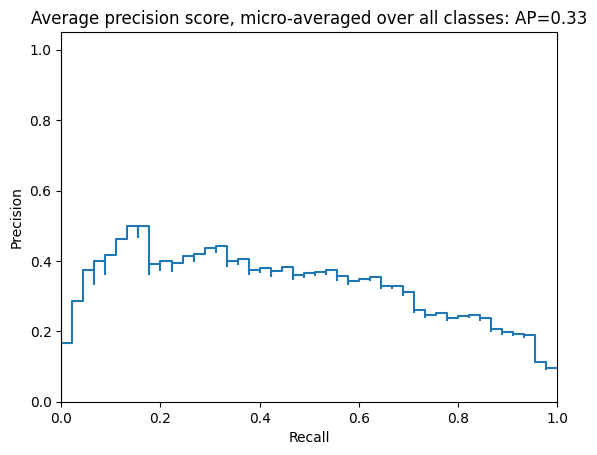

In [91]:

# For each class
precision_LRGLOVE = dict()
recall_LRGLOVE = dict()
average_precision_LRGLOVE = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRGLOVE[i], recall_LRGLOVE[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRGLOVE[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRGLOVE["micro"], recall_LRGLOVE["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRGLOVE["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRGLOVE["micro"]))


plt.figure()
plt.step(recall_LRGLOVE['micro'], precision_LRGLOVE['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRGLOVE["micro"]))

# NB on BERTSL4

In [92]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/best_BERTSL4_mnbc.pickle", 'rb'))
classifier = loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-NB-y_train.pkl", 'rb'))


# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.47


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.47')

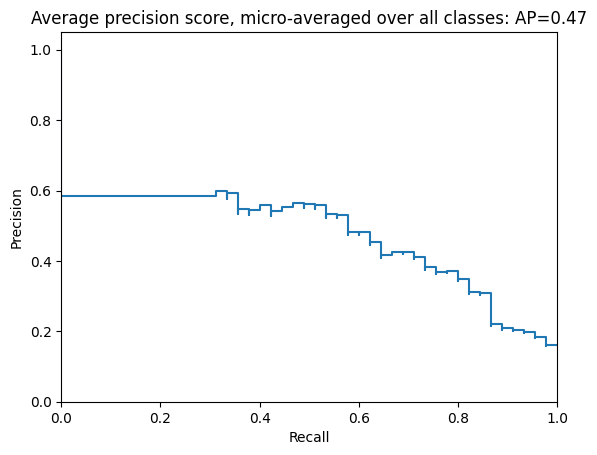

In [93]:

# For each class
precision_NBBERTSL4 = dict()
recall_NBBERTSL4 = dict()
average_precision_NBBERTSL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBERTSL4[i], recall_NBBERTSL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBERTSL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBERTSL4["micro"], recall_NBBERTSL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBERTSL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBERTSL4["micro"]))


plt.figure()
plt.step(recall_NBBERTSL4['micro'], precision_NBBERTSL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBERTSL4["micro"]))

# RF on BERTSL4

In [94]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/best_BERTSL4_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.50


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.50')

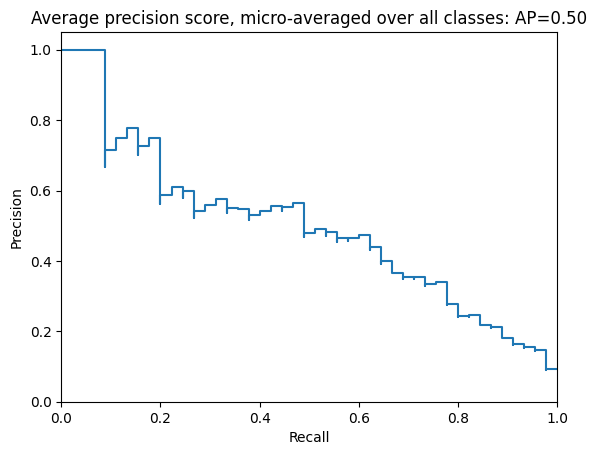

In [95]:

# For each class
precision_RFBERTSL4 = dict()
recall_RFBERTSL4 = dict()
average_precision_RFBERTSL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBERTSL4[i], recall_RFBERTSL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBERTSL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBERTSL4["micro"], recall_RFBERTSL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBERTSL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBERTSL4["micro"]))


plt.figure()
plt.step(recall_RFBERTSL4['micro'], precision_RFBERTSL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBERTSL4["micro"]))

# LR on BERTSL4

In [96]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/best_BERTSL4_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTSL4abs/BERTSL4-LR-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.81


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.81')

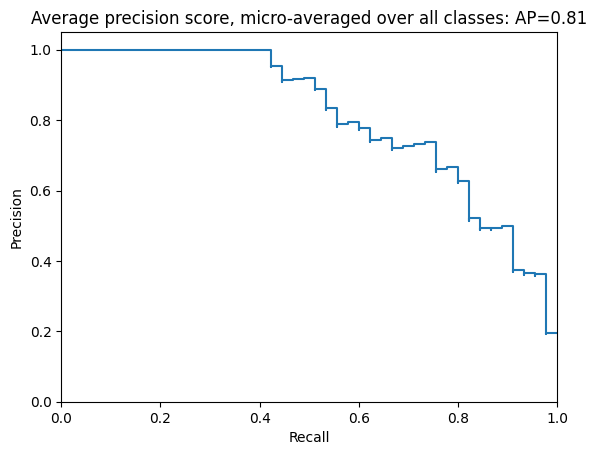

In [97]:

# For each class
precision_LRBERTSL4 = dict()
recall_LRBERTSL4 = dict()
average_precision_LRBERTSL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERTSL4[i], recall_LRBERTSL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERTSL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERTSL4["micro"], recall_LRBERTSL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERTSL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERTSL4["micro"]))


plt.figure()
plt.step(recall_LRBERTSL4['micro'], precision_LRBERTSL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERTSL4["micro"]))

# NB on BERTCL4

In [98]:
# Load NB model
loaded_MNB = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/best_BERTCL4_mnbc.pickle", 'rb'))
classifier= loaded_MNB
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-NB-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-NB-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-NB-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-NB-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)


/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.49


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.49')

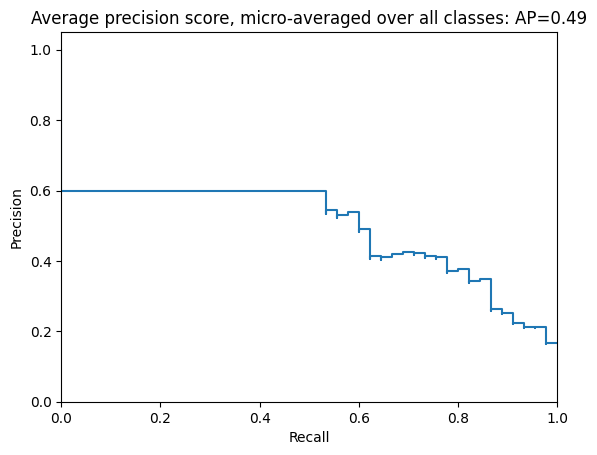

In [99]:

# For each class
precision_NBBERTCL4 = dict()
recall_NBBERTCL4 = dict()
average_precision_NBBERTCL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_NBBERTCL4[i], recall_NBBERTCL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_NBBERTCL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_NBBERTCL4["micro"], recall_NBBERTCL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_NBBERTCL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_NBBERTCL4["micro"]))


plt.figure()
plt.step(recall_NBBERTCL4['micro'], precision_NBBERTCL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_NBBERTCL4["micro"]))

# RF on BERTCL4

In [100]:

# Load RF model
loaded_RF = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/best_BERTCL4_rfc.pickle", 'rb'))
classifier = loaded_RF
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-RF-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-RF-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-RF-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-RF-y_train.pkl", 'rb'))

# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.52


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.52')

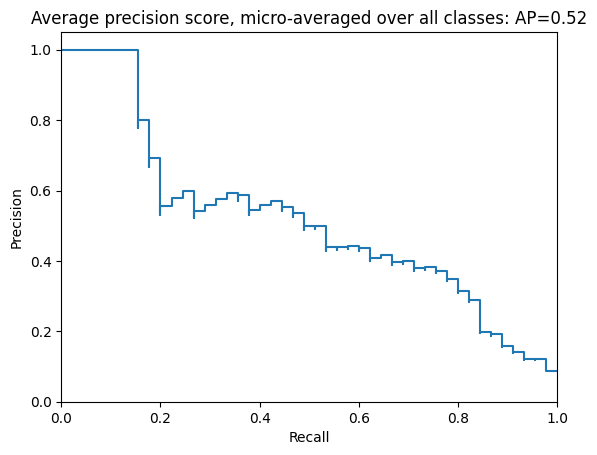

In [101]:

# For each class
precision_RFBERTCL4 = dict()
recall_RFBERTCL4 = dict()
average_precision_RFBERTCL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_RFBERTCL4[i], recall_RFBERTCL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_RFBERTCL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_RFBERTCL4["micro"], recall_RFBERTCL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_RFBERTCL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_RFBERTCL4["micro"]))


plt.figure()
plt.step(recall_RFBERTCL4['micro'], precision_RFBERTCL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_RFBERTCL4["micro"]))

# LR on BERTCL4

In [102]:
# Load LR model
loaded_LR = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/best_BERTCL4_lrc.pickle", 'rb'))
classifier = loaded_LR
# Test Data
X_test = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-LR-X_test.pkl", 'rb'))
y_test = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-LR-y_test.pkl", 'rb'))

X_train = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-LR-X_train.pkl", 'rb'))
y_train = pickle.load(open("../Trained_Models/abstracts only/BERTCL4abs/BERTCL4-LR-y_train.pkl", 'rb'))
# make predictions
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

/home/reqhiem/anaconda3/envs/nlp_class/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Average precision score, micro-averaged over all classes: 0.79


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.79')

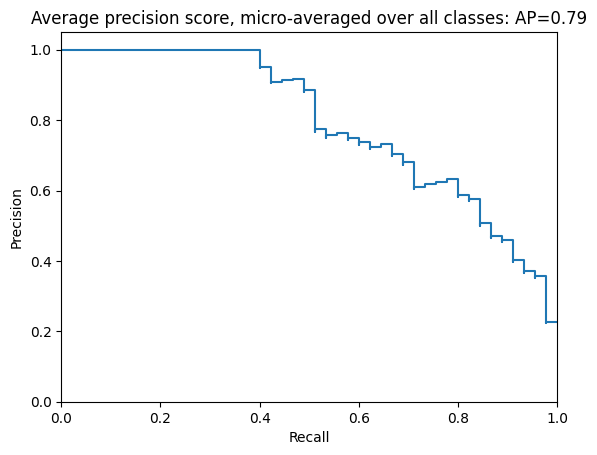

In [103]:

# For each class
precision_LRBERTCL4 = dict()
recall_LRBERTCL4 = dict()
average_precision_LRBERTCL4 = dict()
y_score = classifier.predict_proba(X_test)

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

for i in range(n_classes):
    precision_LRBERTCL4[i], recall_LRBERTCL4[i], _ = precision_recall_curve(y_test_dummies[:, i],
                                                        y_score[:, i])
    average_precision_LRBERTCL4[i] = average_precision_score(y_test_dummies[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_LRBERTCL4["micro"], recall_LRBERTCL4["micro"], _ = precision_recall_curve(y_test_dummies.ravel(),
    y_score.ravel())
average_precision_LRBERTCL4["micro"] = average_precision_score(y_test_dummies, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_LRBERTCL4["micro"]))


plt.figure()
plt.step(recall_LRBERTCL4['micro'], precision_LRBERTCL4['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision_LRBERTCL4["micro"]))

# all micro average precisions

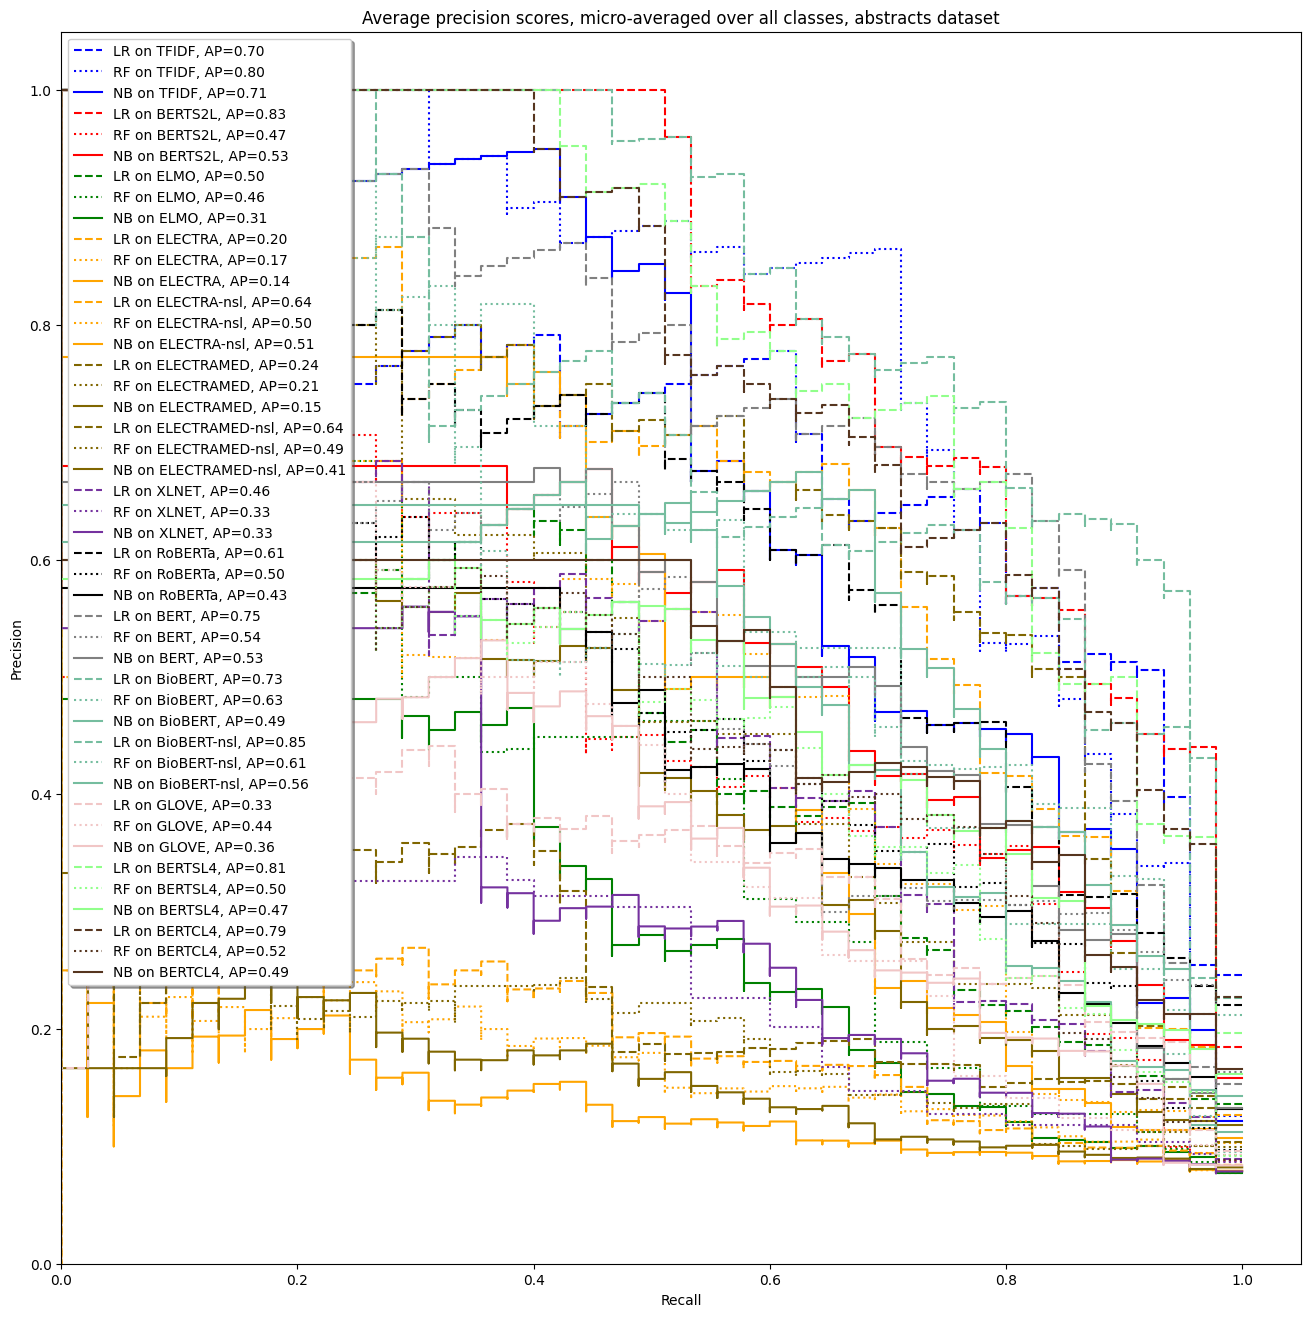

In [105]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,16))


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Average precision scores, micro-averaged over all classes, abstracts dataset')

plt.step(recall_LRTFIDF['micro'], precision_LRTFIDF['micro'],'k--', where='post', color='blue')
plt.step(recall_RFTFIDF['micro'], precision_RFTFIDF['micro'], 'k:', where='post', color='blue')
plt.step(recall_NBTFIDF['micro'], precision_NBTFIDF['micro'], 'k', where='post', color='blue')

plt.step(recall_LRBERTS2L['micro'], precision_LRBERTS2L['micro'], 'k--', where='post', color='red')
plt.step(recall_RFBERTS2L['micro'], precision_RFBERTS2L['micro'], 'k:', where='post', color='red')
plt.step(recall_NBBERTS2L['micro'], precision_NBBERTS2L['micro'], 'k', where='post', color='red')

plt.step(recall_LRELMO['micro'], precision_LRELMO['micro'], 'k--', where='post', color='green')
plt.step(recall_RFELMO['micro'], precision_RFELMO['micro'], 'k:', where='post', color='green')
plt.step(recall_NBELMO['micro'], precision_NBELMO['micro'], 'k', where='post', color='green')

plt.step(recall_LRELECTRA['micro'], precision_LRELECTRA['micro'], 'k--', where='post', color='orange')
plt.step(recall_RFELECTRA['micro'], precision_RFELECTRA['micro'], 'k:', where='post', color='orange')
plt.step(recall_NBELECTRA['micro'], precision_NBELECTRA['micro'], 'k', where='post', color='orange')

plt.step(recall_LRELECTRA_nsl['micro'], precision_LRELECTRA_nsl['micro'], 'k--', where='post', color='orange')
plt.step(recall_RFELECTRA_nsl['micro'], precision_RFELECTRA_nsl['micro'], 'k:', where='post', color='orange')
plt.step(recall_NBELECTRA_nsl['micro'], precision_NBELECTRA_nsl['micro'], 'k', where='post', color='orange')

plt.step(recall_LRELECTRAMED['micro'], precision_LRELECTRAMED['micro'], 'k--', where='post', color='#806600')
plt.step(recall_RFELECTRAMED['micro'], precision_RFELECTRAMED['micro'], 'k:', where='post', color='#806600')
plt.step(recall_NBELECTRAMED['micro'], precision_NBELECTRAMED['micro'], 'k', where='post', color='#806600')

plt.step(recall_LRELECTRAMED_nsl['micro'], precision_LRELECTRAMED_nsl['micro'], 'k--', where='post', color='#806600')
plt.step(recall_RFELECTRAMED_nsl['micro'], precision_RFELECTRAMED_nsl['micro'], 'k:', where='post', color='#806600')
plt.step(recall_NBELECTRAMED_nsl['micro'], precision_NBELECTRAMED_nsl['micro'], 'k', where='post', color='#806600')

plt.step(recall_LRXLNET['micro'], precision_LRXLNET['micro'], 'k--', where='post', color='#75329F')
plt.step(recall_RFXLNET['micro'], precision_RFXLNET['micro'], 'k:', where='post', color='#75329F')
plt.step(recall_NBXLNET['micro'], precision_NBXLNET['micro'], 'k', where='post', color='#75329F')

plt.step(recall_LRRoBERTa['micro'], precision_LRRoBERTa['micro'], 'k--', where='post', color='black')
plt.step(recall_RFRoBERTa['micro'], precision_RFRoBERTa['micro'], 'k:', where='post', color='black')
plt.step(recall_NBRoBERTa['micro'], precision_NBRoBERTa['micro'], 'k', where='post', color='black')

plt.step(recall_LRBERT['micro'], precision_LRBERT['micro'], 'k--', where='post', color='grey')
plt.step(recall_RFBERT['micro'], precision_RFBERT['micro'], 'k:', where='post', color='grey')
plt.step(recall_NBBERT['micro'], precision_NBBERT['micro'], 'k', where='post', color='grey')

plt.step(recall_LRBioBERT['micro'], precision_LRBioBERT['micro'], 'k--', where='post', color='#75BD9F')
plt.step(recall_RFBioBERT['micro'], precision_RFBioBERT['micro'], 'k:', where='post', color='#75BD9F')
plt.step(recall_NBBioBERT['micro'], precision_NBBioBERT['micro'], 'k', where='post', color='#75BD9F')

plt.step(recall_LRBioBERT_nsl['micro'], precision_LRBioBERT_nsl['micro'], 'k--', where='post', color='#75BD9F')
plt.step(recall_RFBioBERT_nsl['micro'], precision_RFBioBERT_nsl['micro'], 'k:', where='post', color='#75BD9F')
plt.step(recall_NBBioBERT_nsl['micro'], precision_NBBioBERT_nsl['micro'], 'k', where='post', color='#75BD9F')

plt.step(recall_LRGLOVE['micro'], precision_LRGLOVE['micro'], 'k--', where='post', color='#F1C6C6')
plt.step(recall_RFGLOVE['micro'], precision_RFGLOVE['micro'], 'k:', where='post', color='#F1C6C6')
plt.step(recall_NBGLOVE['micro'], precision_NBGLOVE['micro'], 'k', where='post', color='#F1C6C6')

plt.step(recall_LRBERTSL4['micro'], precision_LRBERTSL4['micro'], 'k--', where='post', color='#91FF8B')
plt.step(recall_RFBERTSL4['micro'], precision_RFBERTSL4['micro'], 'k:', where='post', color='#91FF8B')
plt.step(recall_NBBERTSL4['micro'], precision_NBBERTSL4['micro'], 'k', where='post', color='#91FF8B')

plt.step(recall_LRBERTCL4['micro'], precision_LRBERTCL4['micro'], 'k--', where='post', color='#56351F')
plt.step(recall_RFBERTCL4['micro'], precision_RFBERTCL4['micro'], 'k:', where='post', color='#56351F')
plt.step(recall_NBBERTCL4['micro'], precision_NBBERTCL4['micro'], 'k', where='post', color='#56351F')


plt.legend(['LR on TFIDF, AP={0:0.2f}'.format(average_precision_LRTFIDF["micro"]), 
           'RF on TFIDF, AP={0:0.2f}'.format(average_precision_RFTFIDF["micro"]),
           'NB on TFIDF, AP={0:0.2f}'.format(average_precision_NBTFIDF["micro"]),
           'LR on BERTS2L, AP={0:0.2f}'.format(average_precision_LRBERTS2L["micro"]), 
           'RF on BERTS2L, AP={0:0.2f}'.format(average_precision_RFBERTS2L["micro"]),
           'NB on BERTS2L, AP={0:0.2f}'.format(average_precision_NBBERTS2L["micro"]),
           'LR on ELMO, AP={0:0.2f}'.format(average_precision_LRELMO["micro"]), 
           'RF on ELMO, AP={0:0.2f}'.format(average_precision_RFELMO["micro"]),
           'NB on ELMO, AP={0:0.2f}'.format(average_precision_NBELMO["micro"]),
           
           'LR on ELECTRA, AP={0:0.2f}'.format(average_precision_LRELECTRA["micro"]), 
           'RF on ELECTRA, AP={0:0.2f}'.format(average_precision_RFELECTRA["micro"]),
           'NB on ELECTRA, AP={0:0.2f}'.format(average_precision_NBELECTRA["micro"]),
           'LR on ELECTRA-nsl, AP={0:0.2f}'.format(average_precision_LRELECTRA_nsl["micro"]), 
           'RF on ELECTRA-nsl, AP={0:0.2f}'.format(average_precision_RFELECTRA_nsl["micro"]),
           'NB on ELECTRA-nsl, AP={0:0.2f}'.format(average_precision_NBELECTRA_nsl["micro"]),
            
           'LR on ELECTRAMED, AP={0:0.2f}'.format(average_precision_LRELECTRAMED["micro"]), 
           'RF on ELECTRAMED, AP={0:0.2f}'.format(average_precision_RFELECTRAMED["micro"]),
           'NB on ELECTRAMED, AP={0:0.2f}'.format(average_precision_NBELECTRAMED["micro"]),
           'LR on ELECTRAMED-nsl, AP={0:0.2f}'.format(average_precision_LRELECTRAMED_nsl["micro"]), 
           'RF on ELECTRAMED-nsl, AP={0:0.2f}'.format(average_precision_RFELECTRAMED_nsl["micro"]),
           'NB on ELECTRAMED-nsl, AP={0:0.2f}'.format(average_precision_NBELECTRAMED_nsl["micro"]),
            
           'LR on XLNET, AP={0:0.2f}'.format(average_precision_LRXLNET["micro"]), 
           'RF on XLNET, AP={0:0.2f}'.format(average_precision_RFXLNET["micro"]),
           'NB on XLNET, AP={0:0.2f}'.format(average_precision_NBXLNET["micro"]),
           'LR on RoBERTa, AP={0:0.2f}'.format(average_precision_LRRoBERTa["micro"]), 
           'RF on RoBERTa, AP={0:0.2f}'.format(average_precision_RFRoBERTa["micro"]),
           'NB on RoBERTa, AP={0:0.2f}'.format(average_precision_NBRoBERTa["micro"]),
           'LR on BERT, AP={0:0.2f}'.format(average_precision_LRBERT["micro"]), 
           'RF on BERT, AP={0:0.2f}'.format(average_precision_RFBERT["micro"]),
           'NB on BERT, AP={0:0.2f}'.format(average_precision_NBBERT["micro"]),
            
           'LR on BioBERT, AP={0:0.2f}'.format(average_precision_LRBioBERT["micro"]), 
           'RF on BioBERT, AP={0:0.2f}'.format(average_precision_RFBioBERT["micro"]),
           'NB on BioBERT, AP={0:0.2f}'.format(average_precision_NBBioBERT["micro"]),
           'LR on BioBERT-nsl, AP={0:0.2f}'.format(average_precision_LRBioBERT_nsl["micro"]), 
           'RF on BioBERT-nsl, AP={0:0.2f}'.format(average_precision_RFBioBERT_nsl["micro"]),
           'NB on BioBERT-nsl, AP={0:0.2f}'.format(average_precision_NBBioBERT_nsl["micro"]),
            
           'LR on GLOVE, AP={0:0.2f}'.format(average_precision_LRGLOVE["micro"]), 
           'RF on GLOVE, AP={0:0.2f}'.format(average_precision_RFGLOVE["micro"]),
           'NB on GLOVE, AP={0:0.2f}'.format(average_precision_NBGLOVE["micro"]),
           'LR on BERTSL4, AP={0:0.2f}'.format(average_precision_LRBERTSL4["micro"]), 
           'RF on BERTSL4, AP={0:0.2f}'.format(average_precision_RFBERTSL4["micro"]),
           'NB on BERTSL4, AP={0:0.2f}'.format(average_precision_NBBERTSL4["micro"]),
           'LR on BERTCL4, AP={0:0.2f}'.format(average_precision_LRBERTCL4["micro"]), 
           'RF on BERTCL4, AP={0:0.2f}'.format(average_precision_RFBERTCL4["micro"]),
           'NB on BERTCL4, AP={0:0.2f}'.format(average_precision_NBBERTCL4["micro"])
           ], loc='best', shadow=True)


fig = plt.gcf()
plt.savefig('abstractsPRCplot.png',
            
            dpi=350
            )

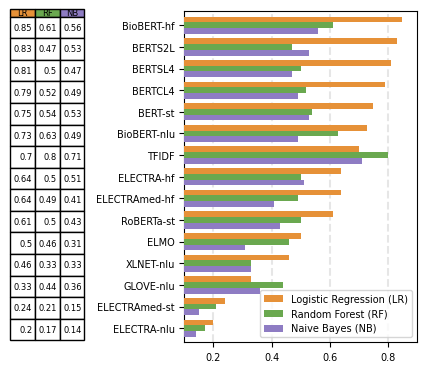

In [106]:

labels = ['TFIDF', 'GLOVE-nlu', 'ELMO', 'BERT-st', 'BERTCL4', 'BERTSL4', 'BERTS2L', 'BioBERT-nlu', 'BioBERT-hf', 'RoBERTa-st', 'XLNET-nlu', 'ELECTRA-nlu', 'ELECTRA-hf', 'ELECTRAmed-st', 'ELECTRAmed-hf']

LR_AP = [0.70, 0.33, 0.50, 0.75, 0.79, 0.81, 0.83, 0.73, 0.85, 0.61, 0.46, 0.20, 0.64, 0.24, 0.64]
RF_AP = [0.80, 0.44, 0.46 , 0.54, 0.52, 0.50, 0.47, 0.63, 0.61, 0.50, 0.33, 0.17, 0.50, 0.21, 0.49]
NB_AP = [0.71, 0.36, 0.31, 0.53, 0.49, 0.47, 0.53, 0.49, 0.56, 0.43, 0.33, 0.14, 0.51, 0.15, 0.41]

pltdf = pd.DataFrame({'Logistic Regression (LR)': LR_AP,
                      'Random Forest (RF)': RF_AP,
                      'Naive Bayes (NB)': NB_AP}, index=labels)

pltdf=pltdf.sort_values(by='Logistic Regression (LR)', ascending=False)

ax = pltdf.plot(kind='barh', fontsize=7, figsize=(3, 4.3), zorder=10, color=["#e69138", "#6aa84f", "#8e7cc3"], width=.8)
ax.set(xlim=[0.1, 0.9])

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.1, color='#0d0e10', zorder=2)
ax.invert_yaxis()
   

# Plot bars and create text labels for the table

data=pltdf.sort_values(by='Logistic Regression (LR)', ascending=False).to_numpy().tolist()

index=pltdf.sort_values(by='Logistic Regression (LR)', ascending=False).index.values.tolist()

colors = sns.color_palette(palette='colorblind')   
# Add a table at the left of the axes
the_table = ax.table(cellText=data,
                     bbox=[-.75, 0.006, 0.32, 1],
                     colLabels= ["LR", "RF", "NB"],
                     colColours=["#e69138", "#6aa84f", "#8e7cc3"],
                     loc='left')

cellDict = the_table.get_celld()
for i in range(0, 3):
    cellDict[(0,i)].set_height(3.5)
    for j in range(1,len(data)+1):
        cellDict[(j,i)].set_height(10)

the_table.auto_set_font_size(True)
the_table.set_fontsize(7)
plt.legend(fontsize=7)

#plt.show()
fig = plt.gcf()
plt.savefig('abstractsPRCscores.png',
            bbox_inches='tight',
            dpi=350
            )
